In [1]:
!python -m pip install prophet


  Using cached holidays-0.47-py3-none-any.whl.metadata (23 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 660.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.6/13.3 MB 3.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/13.3 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 8.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.3 MB 10.0 MB/s eta 0:00:02
   ---------- ----------------------------- 3.6/13.3 MB 10.5 MB/s eta 0:00:01
   ------------- -------------------------- 4.5/13.3 MB 11.0 MB/s eta 0:00:01
   ---------------- ----------------------- 5.5/13.3 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.8/13.3 MB 12.3 MB/s eta 0:00:01
   ----------

In [1]:
from prophet import Prophet
import pandas as pd 
from prophet.plot import plot_plotly,plot_components_plotly

In [2]:
df = pd.read_excel('Google Analytics -  Dataset.xlsx',usecols=(1,2,3,4,5,6,7,8,9,10))
df.head(5)

,Date,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue
0,2021-01-05,0,0,0.0,1.0,1,0.0,2.0,0,0.0
1,2021-01-06,0,0,0.0,1.0,1,0.0,2.0,0,0.0
2,2021-01-10,0,0,0.0,1.0,1,0.0,2.0,0,0.0
3,2021-01-14,0,0,0.0,1.0,1,0.0,2.0,0,0.0
4,2021-01-24,0,0,0.0,1.0,1,0.0,2.0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5000 non-null   datetime64[ns]
 1   Impressions       5000 non-null   int64         
 2   Clicks            5000 non-null   int64         
 3   CTR               5000 non-null   float64       
 4   Average Position  5000 non-null   float64       
 5   Sessions          5000 non-null   int64         
 6   Bounce Rate       5000 non-null   float64       
 7   Pages / Session   5000 non-null   float64       
 8   Transactions      5000 non-null   int64         
 9   Revenue           5000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 390.8 KB


In [4]:
df=df[["Date","Revenue"]]
df.head()

,Date,Revenue
0,2021-01-05,0.0
1,2021-01-06,0.0
2,2021-01-10,0.0
3,2021-01-14,0.0
4,2021-01-24,0.0


In [5]:
df.columns =['ds','y']

<Axes: xlabel='ds'>

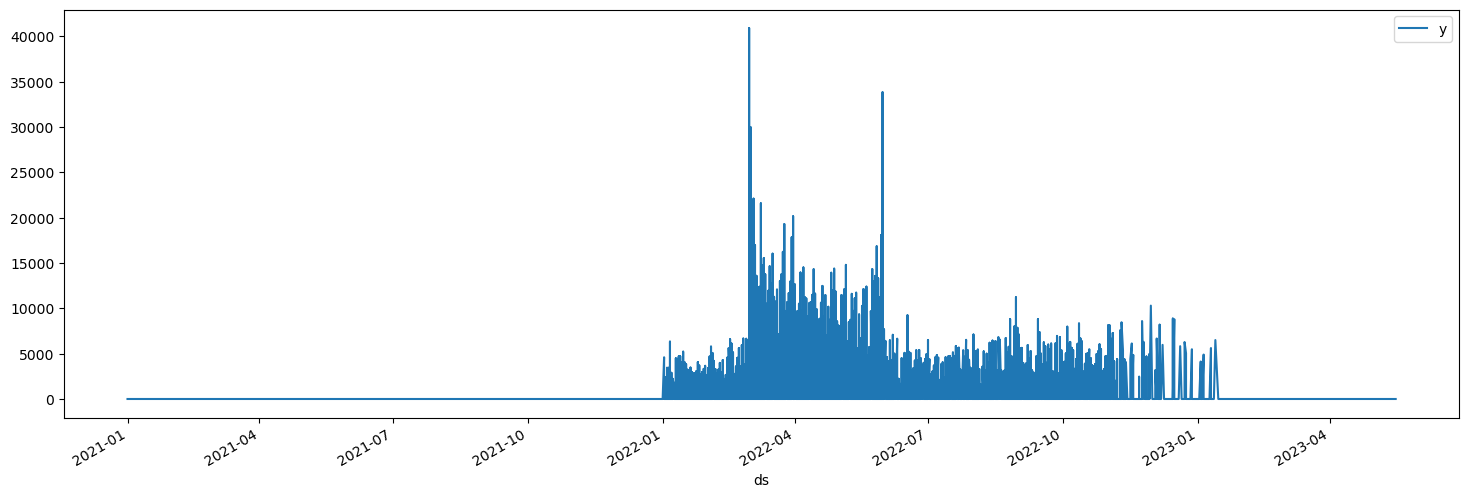

In [6]:
df.plot(x='ds',y='y',figsize=(18,6))

In [7]:
len(df)

5000

In [8]:
train = df.iloc[:len(df)-944]
test = df.iloc[:len(df)-944:]

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=944,freq='D')
forcast = m.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1754,2025-12-11,0.0,-5.981562e-08,5.796072e-08,-5.996155e-08,5.794479e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,2025-12-12,0.0,-6.061830e-08,5.761647e-08,-6.009741e-08,5.806224e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,2025-12-13,0.0,-5.957208e-08,5.832451e-08,-6.020214e-08,5.817968e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,2025-12-14,0.0,-6.018536e-08,5.789346e-08,-6.026074e-08,5.829713e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1758,2025-12-15,0.0,-6.009103e-08,5.772448e-08,-6.031934e-08,5.841457e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1754,2025-12-11,0.0,-5.981562e-08,5.796072e-08
1755,2025-12-12,0.0,-6.061830e-08,5.761647e-08
1756,2025-12-13,0.0,-5.957208e-08,5.832451e-08
1757,2025-12-14,0.0,-6.018536e-08,5.789346e-08
1758,2025-12-15,0.0,-6.009103e-08,5.772448e-08


In [13]:
test.tail()

,ds,y
4051,2022-04-14,0.0
4052,2022-01-23,0.0
4053,2022-03-03,0.0
4054,2022-05-20,0.0
4055,2022-10-29,0.0


In [14]:
plot_plotly(m,forcast)

In [15]:
plot_components_plotly(m,forcast)

In [16]:
from statsmodels.tools.eval_measures import rmse

In [17]:
prediction = forcast.iloc[-944]['yhat']

In [18]:
print(rmse(prediction,test['y']))
print(test['y'].mean())

0.0
0.0
